In [1]:
pwd

'/Users/f0053cz/Dartmouth College Dropbox/Rekha Sreekumar Varrier/postdoc_Dartmouth/psyanim_behav_paper/version2/scripts_data_for_beh_paper/code/6_trait_beh_mixed_batch'

In [74]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

path_to_add = os.path.abspath('../')
print('path_to_add:',path_to_add)
sys.path.append(path_to_add)
from func_curvefit import r_squared
from general_utility_functions import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

path_to_add: /Users/f0053cz/Dartmouth College Dropbox/Rekha Sreekumar Varrier/postdoc_Dartmouth/psyanim_behav_paper/version2/scripts_data_for_beh_paper/code


In [75]:
s=12 # CHANGE FONTSIZE HERE
plt.rc('font', size=s) #controls default text size
plt.rc('axes', titlesize=s) #fontsize of the title
plt.rc('axes', labelsize=s) #fontsize of the x and y labels
plt.rc('xtick', labelsize=s) #fontsize of the x tick labels
plt.rc('ytick', labelsize=s) #fontsize of the y tick labels
plt.rc('legend', fontsize=s) #fontsize of the legend

In [76]:
root_dir = '../../data/subtlety_playfight_data/' #'/Users/f0053cz/Documents/psyanim_v2/subtlety_playfight/8_subsfrom3and7/'

In [77]:
df = pd.read_csv(f'{root_dir}/curvefit_traits_merged_linearpf.csv',index_col=[0])
print(df.shape)
df.head()

(276, 42)


,index,subID,r_squared_subt,nrmse_subt,aic_subt,center,PSE_subt,sigma_subt,bias_xmin_subt,bias_xmax_subt,...,comm,posAffect,negAffect,neuroticism,extraversion,openness,agreeableness,conscientiousness,loneliness,nfriends
0,0,30002.0,0.978946,0.059585,-35.485036,0.546183,0.552951,0.103360,0.031291,0.067887,...,16.000000,20.0,0.0,38.0,28.000000,31.000000,34.0,39.0,56.0,3.0
1,1,30004.0,0.994784,0.031310,-44.493407,0.311200,0.276896,0.076866,0.194061,0.000105,...,15.000000,25.0,11.0,38.0,26.181818,50.000000,50.0,46.0,56.0,3.0
2,2,30005.0,0.985636,0.048320,-38.418617,0.380063,0.320583,0.115353,0.249789,0.040080,...,16.000000,20.0,21.0,51.0,39.000000,40.000000,43.0,19.0,41.0,5.0
3,3,30006.0,0.983710,0.057399,-36.008190,0.465887,0.464823,0.079221,0.009433,0.001171,...,3.000000,25.0,0.0,18.0,41.000000,31.000000,44.0,57.0,30.0,4.0
4,4,30008.0,0.900792,0.110236,-26.871886,0.385415,0.325118,0.172585,0.289378,0.128370,...,12.222222,28.0,4.0,27.0,46.000000,42.545455,46.0,50.0,45.0,5.0


In [78]:
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(276, 42)
(275, 42)


In [79]:
cols_pref = ['r_squared','sigma','center','obj_center','bias_xmin','bias_xmax','bias_diff','bias_ratio','bias_xmin_norm','mean_bias','amplitude']

In [80]:
df.columns

Index(['index', 'subID', 'r_squared_subt', 'nrmse_subt', 'aic_subt', 'center',
       'PSE_subt', 'sigma_subt', 'bias_xmin_subt', 'bias_xmax_subt',
       'bias_lower_subt', 'bias_upper_subt', 'flipped_subt', 'range_subt',
       'bias_subt', 'r_squared_pf', 'nrmse_pf', 'aic_pf', 'PSE_pf', 'slope_pf',
       'intercept', 'bias_xmin_pf', 'bias_xmax_pf', 'bias_lower_pf',
       'bias_upper_pf', 'flipped_pf', 'range_pf', 'bias_pf', 'social_skill',
       'attn_switch', 'img', 'attn_to_det', 'comm', 'posAffect', 'negAffect',
       'neuroticism', 'extraversion', 'openness', 'agreeableness',
       'conscientiousness', 'loneliness', 'nfriends'],
      dtype='object')

In [81]:
start_ind

28

In [82]:
trait_cols = ['subID']
start_ind = np.where(df.columns == 'social_skill')[0][0]
trait_cols.extend(df.columns[start_ind:])#[i for i in df.columns if 'reweigh' in i])
trait_cols

['subID',
 'social_skill',
 'attn_switch',
 'img',
 'attn_to_det',
 'comm',
 'posAffect',
 'negAffect',
 'neuroticism',
 'extraversion',
 'openness',
 'agreeableness',
 'conscientiousness',
 'loneliness',
 'nfriends']

In [83]:
X = df[trait_cols]
print(X.shape)

(275, 15)


In [84]:
# X = aX[~X.isna().any(axis=1)]
pca = PCA().fit(X.iloc[:,1:])

In [85]:
results_dir = '../../results/subtlety_playfight_mixed/trait-beh_pflinear'

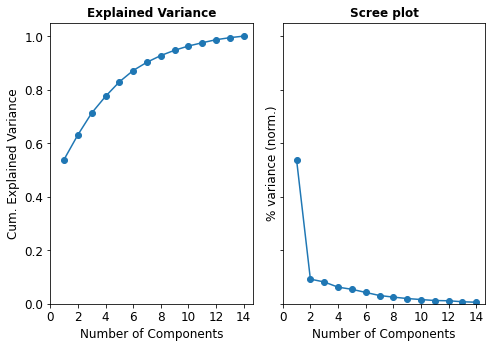

In [86]:
# plotting explained variance
fig,axs = plt.subplots(figsize = (7,5), nrows = 1, ncols = 2,sharey=True,sharex=True)
ax = axs[0]
ax.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
ax.set_xlabel('Number of Components')
ax.set_ylabel('Cum. Explained Variance')
ax.set_title('Explained Variance',fontweight='bold')
# ax.grid(True)
ax.set_ylim(0, 1.05)

ax = axs[1]
ax.plot(range(1, len(pca.explained_variance_ratio_) + 1),pca.explained_variance_ratio_, marker='o', linestyle='-')
ax.set_xlabel('Number of Components')
ax.set_ylabel('% variance (norm.)')
ax.set_title('Scree plot',fontweight='bold')
# plt.grid(True)
ax.set_ylim(0, 1.05)
ax.set_xticks(np.arange(0,15,2))

plt.tight_layout()
plt.savefig(f'{results_dir}/PCA_scree_EV_mixeddesign.png')


In [87]:
pca_sublevel = PCA().fit_transform(X.iloc[:,1:])
pca_sublevel.shape

(275, 14)

nPCs_of_interest = 1

In [88]:
# PC1
loadings = pd.DataFrame(pca.components_, columns=X.columns[1:])
loading_values = loadings.iloc[0,:].values[:,np.newaxis]
loading_values.shape

(14, 1)

In [89]:
cmap = 'BrBG'#'RdBu_r'?

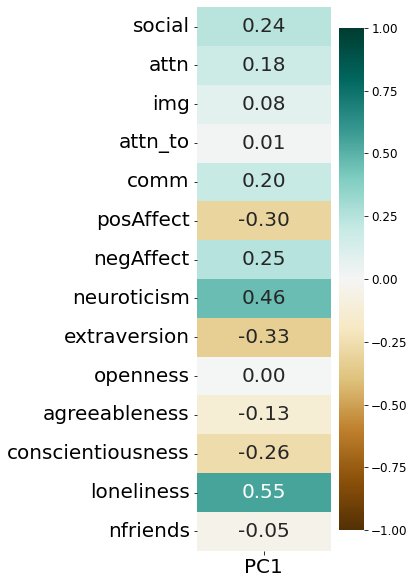

In [90]:
fig, ax = plt.subplots(figsize=(3, 10))
sns.heatmap(loading_values, annot=True, fmt='.2f', cmap=cmap, vmin=-1, vmax=1,annot_kws={"size": 20})
plt.yticks(.5+np.arange(14),loadings.columns,rotation=0,fontsize=20)
plt.xticks([.5],['PC1'], rotation=0,fontsize=20)
yticks = plt.gca().get_yticklabels()
plt.gca().set_yticklabels(['_'.join(i.get_text().split('_')[:-1]) if '_' in i.get_text() else i for i in yticks])
plt.savefig(f'{results_dir}/PC1_loadings.png',dpi = 300, bbox_inches = 'tight')

In [91]:
pca_sublevel = PCA().fit_transform(X.iloc[:,1:])
pca_sublevel.shape

(275, 14)

In [92]:
pca_sublevel = pca_sublevel[:,0]
pca_sublevel.shape

(275,)

# plots

In [93]:
from scipy import stats

def get_p(p):
    if p < .001:
        return "p < .001"
    elif p < .01:
        return f"p={p:.3f}"
    else:
        return f"p={p:.2f}"

In [94]:
pca_sublevel.max(),pca_sublevel.min()

(59.31156603181244, -46.79400960821824)

In [95]:
X['PC1'] = pca_sublevel
X

/Users/f0053cz/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,subID,social_skill,attn_switch,img,attn_to_det,comm,posAffect,negAffect,neuroticism,extraversion,openness,agreeableness,conscientiousness,loneliness,nfriends,PC1
0,30002.0,21.0,23.0,9.0,10.0,16.000000,20.0,0.0,38.0,28.000000,31.000000,34.0,39.0,56.0,3.0,16.107847
1,30004.0,21.0,20.0,9.0,15.0,15.000000,25.0,11.0,38.0,26.181818,50.000000,50.0,46.0,56.0,3.0,13.408261
2,30005.0,17.0,29.0,21.0,16.0,16.000000,20.0,21.0,51.0,39.000000,40.000000,43.0,19.0,41.0,5.0,20.628666
3,30006.0,8.0,10.0,5.0,10.0,3.000000,25.0,0.0,18.0,41.000000,31.000000,44.0,57.0,30.0,4.0,-27.570412
4,30008.0,5.0,15.0,12.0,17.0,12.222222,28.0,4.0,27.0,46.000000,42.545455,46.0,50.0,45.0,5.0,-12.516037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,30344.0,27.0,18.0,19.0,20.0,16.000000,14.0,0.0,25.0,29.000000,49.000000,35.0,56.0,41.0,6.0,0.116869
272,30345.0,15.0,14.0,6.0,13.0,5.000000,15.0,15.0,36.0,23.000000,37.000000,45.0,54.0,72.0,1.0,20.240816
273,30346.0,16.0,25.0,7.0,16.0,8.000000,27.0,6.0,49.0,36.000000,36.000000,43.0,44.0,56.0,3.0,12.867489
274,30348.0,8.0,7.0,4.0,11.0,2.000000,27.0,0.0,18.0,42.000000,41.000000,48.0,53.0,24.0,4.0,-32.053054


In [96]:
df['PC1'] = pca_sublevel
df.shape

(275, 43)

In [97]:
df.to_csv(f'{root_dir}/curvefit_traits_merged_linearpf_withPC1.csv')

In [98]:
subt_col_labels = ['PSE_subt', 'range_subt', 'bias_subt','sigma_subt']
pf_col_labels = ['PSE_pf','slope_pf','bias_pf']

In [99]:
df

,index,subID,r_squared_subt,nrmse_subt,aic_subt,center,PSE_subt,sigma_subt,bias_xmin_subt,bias_xmax_subt,...,posAffect,negAffect,neuroticism,extraversion,openness,agreeableness,conscientiousness,loneliness,nfriends,PC1
0,0,30002.0,0.978946,0.059585,-35.485036,0.546183,0.552951,0.103360,0.031291,0.067887,...,20.0,0.0,38.0,28.000000,31.000000,34.0,39.0,56.0,3.0,16.107847
1,1,30004.0,0.994784,0.031310,-44.493407,0.311200,0.276896,0.076866,0.194061,0.000105,...,25.0,11.0,38.0,26.181818,50.000000,50.0,46.0,56.0,3.0,13.408261
2,2,30005.0,0.985636,0.048320,-38.418617,0.380063,0.320583,0.115353,0.249789,0.040080,...,20.0,21.0,51.0,39.000000,40.000000,43.0,19.0,41.0,5.0,20.628666
3,3,30006.0,0.983710,0.057399,-36.008190,0.465887,0.464823,0.079221,0.009433,0.001171,...,25.0,0.0,18.0,41.000000,31.000000,44.0,57.0,30.0,4.0,-27.570412
4,4,30008.0,0.900792,0.110236,-26.871886,0.385415,0.325118,0.172585,0.289378,0.128370,...,28.0,4.0,27.0,46.000000,42.545455,46.0,50.0,45.0,5.0,-12.516037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,271,30344.0,0.982096,0.049413,-38.105636,0.436226,0.361233,0.135840,0.273528,0.070757,...,14.0,0.0,25.0,29.000000,49.000000,35.0,56.0,41.0,6.0,0.116869
272,272,30345.0,0.900182,0.135227,-24.011227,0.480709,0.475067,0.013915,0.166667,0.000000,...,15.0,15.0,36.0,23.000000,37.000000,45.0,54.0,72.0,1.0,20.240816
273,273,30346.0,0.995720,0.031059,-44.606204,0.426850,0.426850,0.045409,0.000083,0.000003,...,27.0,6.0,49.0,36.000000,36.000000,43.0,44.0,56.0,3.0,12.867489
274,274,30348.0,0.405749,0.219546,-17.226706,0.604790,0.729328,0.392303,0.355133,0.444629,...,27.0,0.0,18.0,42.000000,41.000000,48.0,53.0,24.0,4.0,-32.053054


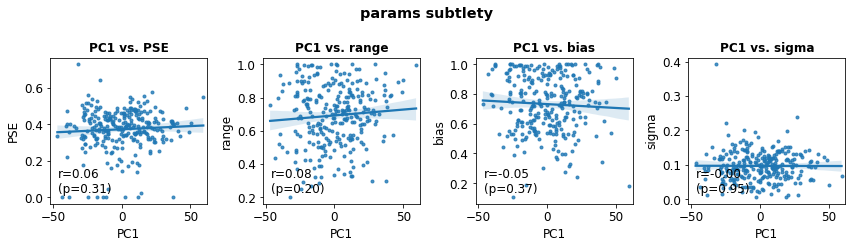

In [103]:
r_subt=np.full((len(subt_col_labels),1),np.nan)
p_subt=np.full((len(subt_col_labels),1),np.nan)

fig,axs = plt.subplots(ncols=len(subt_col_labels),nrows=1,figsize=(3*len(subt_col_labels),3.5))#,sharex=True)
for i,param in enumerate(subt_col_labels):#y_subt.columns):
    # param = param + '_subt'
    ax = axs[i]

    x,y = pca_sublevel, df[param]#y_subt[param]
    rows = (~np.isnan(x)) & (~np.isnan(y)) & (~np.isinf(x)) & (~np.isinf(y))
    x = x[rows]
    y = y[rows]

    sns.regplot(x=x, y = y,ax=ax, marker='.', color = 'tab:blue')
    ax.set_title(f'PC{i+1} vs.\n{param}')
    ax.set_ylabel('_'.join(param.split('_')[:-1]))
    ax.set_xlabel('PC1')
    ax.set_xlim(-52,62)
    # ax.set_ylim(ylims[i][0],ylims[i][1])

    r,p = stats.pearsonr(x,y)
    r_subt[i],p_subt[i] = r,p
    if p < .05:
        color = 'r'
    else:
        color = 'k'

    xy = (0.05,.25)
    ax.annotate(f'r={r:.2f}\n({get_p(p)})',xy=xy,xycoords='axes fraction', color = color,ha='left',va='top')
    ax.set_title(f'PC1 vs. {param[:-5]}',fontweight='bold')
    ax.set_xlabel('PC1')

plt.suptitle('params subtlety', fontweight='bold')
plt.tight_layout()

# plt.savefig('../results/PC1_vs_curvefit_params_subtlety_final_withsigma.png')

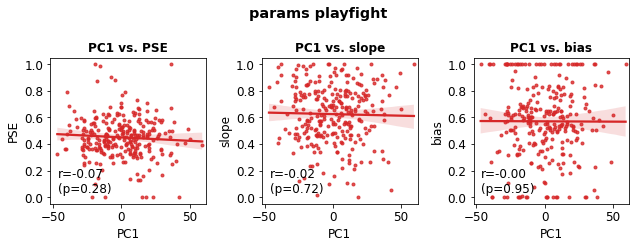

In [106]:
r_pf=np.full((len(pf_col_labels),1),np.nan)
p_pf=np.full((len(pf_col_labels),1),np.nan)

fig,axs = plt.subplots(ncols=len(pf_col_labels),nrows=1,figsize=(3*len(pf_col_labels),3.5))#,sharex=True)
for i,param in enumerate(pf_col_labels):#y_pf.columns):
    # param = param + '_pf'
    ax = axs[i]
    
    x,y = pca_sublevel, df[param]#_pf[param]
    rows = (~np.isnan(x)) & (~np.isnan(y)) & (~np.isinf(x)) & (~np.isinf(y))
    x = x[rows]
    y = y[rows]

    sns.regplot(x=x, y = y, ax=ax, marker='.', color = 'tab:red')
    ax.set_ylabel('_'.join(param.split('_')[:-1]))
    ax.set_xlabel('PC1')
    ax.set_xlim(-52,62)
    # ax.set_ylim(ylims[i][0],ylims[i][1])
    
    r,p = stats.pearsonr(x,y)
    r_pf[i],p_pf[i] = r,p
    if p < .05:
        color = 'r'
    else:
        color = 'k'
    
    # if i == 2:
    #     xy = (0.05,.95)
    # else:
    xy = (0.05,.25)
    ax.annotate(f'r={r:.2f}\n({get_p(p)})',xy=xy,xycoords='axes fraction', color = color,ha='left',va='top')
    ax.set_title(f'PC1 vs. {param[:-3]}',fontweight='bold')

plt.suptitle('params playfight', fontweight='bold')
plt.tight_layout()
# plt.savefig('../results/PC1_vs_curvefit_params_pf_final.png')

# diff plots (scrapped)

In [107]:
# r_diff=np.full((len(new_params[:-1]),1),np.nan)
# p_diff=np.full((len(new_params[:-1]),1),np.nan)

# fig,axs = plt.subplots(ncols=len(new_params[:-1]),nrows=1,figsize=(3*len(new_params[:-1]),3))#,sharex=True)

# for i,param in enumerate(new_params[:-1]):
    
#     ax = axs[i]
#     # param = param + '_diff'
    
#     x,y = pca_sublevel, df[param]#y_diff[param]
#     rows = (~np.isnan(x)) & (~np.isnan(y)) & (~np.isinf(x)) & (~np.isinf(y))
#     x=x[rows]
#     y=y[rows]

#     sns.regplot(x=x, y = y,ax=ax, marker='.', color = 'k')
#     # ax.set_ylabel('_'.join(param.split('_')[:-1]))
#     ax.set_xlabel('PC1')
#     ax.set_xlim(-52,62)
#     ax.hlines(0,-52,62,ls=':',color = 'grey')
#     r,p = pearsonr(x,y)
#     r_diff[i],p_diff[i] = r,p
#     if p < .05:
#         color = 'r'
#     else:
#         color = 'k'
#     ax.annotate(f'r={r:.2f}\n({get_p(p)})',xy=(0.05,.25),xycoords='axes fraction', color = color,ha='left',va='top')
#     ax.set_title(f'PC1 vs. {param}',fontweight='bold')

# plt.suptitle('params playfight - subtlety', fontweight='bold')

# plt.tight_layout()
# plt.savefig('../results/PC1_vs_curvefit_params_pf-subtlety_final.png')

In [108]:
# ind=1
# param_ = new_terms[ind]
# print(param_)
# # x,y = pca_sublevel, df[new_terms[ind]+'_subt']#_pf[param]
# x,y1,y2 = pca_sublevel, df[new_terms[ind]+'_subt'], df[new_terms[ind]+'_pf']#_pf[param]
# subID = X['subID']
# rows = (~np.isnan(x)) & (~np.isnan(y1)) & (~np.isnan(y2)) & (~np.isinf(x)) & (~np.isinf(y1))  & (~np.isinf(y2))
# x = x[rows]
# y1 = y1[rows].values
# y2 = y2[rows].values
# subID = subID[rows].values

# x = x-x.min()
# x=x/x.max()
# all_df = pd.DataFrame({'subID':subID, 'pc1':x, param_ + '_subt': y1, param_ + '_pf':y2})
# all_df[param_ + '_pf-subt'] = all_df[param_ + '_pf'] - all_df[param_ + '_subt']
# # all_df.sort_values(by=[param_ + '_pf-subt'],ascending=False,inplace=True)
# all_df.sort_values(by=[param_ + '_pf'],ascending=True,inplace=True)
# all_df.head(20)